# Penalized Regression

## Importing Packages

In [ ]:
import numpy as np
import pandas as pd

## Reading-In Data

In [ ]:
df_ml = pd.read_csv('../data/data_ml_chapter_1.csv')
df_ml

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd,R1M_Usd_median,R12M_Usd_median,R1M_Usd_C,R12M_Usd_C
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.84,0.88,0.089,0.104,0.344,-0.041,0.019,-0.0560,1.0,1.0
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.84,0.88,0.039,0.091,-0.011,-0.253,0.006,-0.0965,1.0,0.0
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.87,0.88,-0.012,0.101,0.118,-0.366,0.006,-0.1350,0.0,0.0
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,1.00,0.99,0.174,-0.144,-0.518,-0.376,-0.025,-0.0320,1.0,0.0
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,1.00,0.99,-0.106,-0.576,-0.535,-0.113,0.011,-0.0035,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268331,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.34,0.63,-0.029,-0.027,0.038,0.112,0.041,0.0980,0.0,1.0
268332,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.29,0.64,0.028,0.077,0.175,0.122,0.007,0.1900,1.0,0.0
268333,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.27,0.64,0.011,0.076,0.152,0.091,0.039,0.1550,0.0,0.0
268334,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.26,0.66,0.045,0.178,0.196,0.040,0.020,0.1155,1.0,0.0


In [ ]:
pd.options.display.max_seq_items = 200
print(df_ml.columns)

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

## Organizing Feature Names

In [ ]:
columns_to_drop = [
    'stock_id', 'date', # non-feature identifiers
    'R1M_Usd', 'R3M_Usd', 'R6M_Usd', # possible categories
    'R12M_Usd', 'R1M_Usd_median', 'R12M_Usd_median', # possible categories
    'R1M_Usd_C', 'R12M_Usd_C' # possible categories
]

In [ ]:
df_ml.drop(columns=columns_to_drop).columns

Index(['Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd', 'Asset_Turnover',
       'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales', 'Cash_Div_Cf',
       'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld', 'Dps', 'Ebit_Bv',
       'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin', 'Eps', 'Eps_Basic',
       'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev', 'Ev_Ebitda',
       'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin', 'Fcf_Noa', 'Fcf_Oa',
       'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld', 'Free_Ps_Cf', 'Int_Rev',
       'Interest_Expense', 'Mkt_Cap_12M_Usd', 'Mkt_Cap_3M_Usd',
       'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd', 'Mom_Sharp_11M_Usd',
       'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt', 'Net_Debt_Cf',
       'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin', 'Ni_Oa',
       'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_Cf', 'Pb', 'Pe', 'Pt

In [ ]:
# this first line is how they do it in the book and it seems to be wrong
#features = list(df_ml.iloc[:,3:95].columns) # Keep the feature's column names (hard-coded, beware!)
features = list(df_ml.drop(columns=columns_to_drop).columns)

features_short = [
    'Div_Yld',
    'Eps', 
    'Mkt_Cap_12M_Usd', 
    'Mom_11M_Usd', 
    'Ocf',
    'Pb', 
    'Vol1Y_Usd',
]

## Importing Constructors and Separating out Features and Labels

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
X = df_ml[features] #features
y = df_ml['R1M_Usd'] #label

## Lasso

### Fitting Model for Different Values of `alpha`

In [ ]:
alphas = np.arange(1e-4, 1.0e-3, 1e-5) # setting various levels of alpha
lasso_res = {} # creating a dict that will store model coefficients 

for alpha in alphas: # looping through the different alphas/lambdas values
  lasso = Lasso(alpha=alpha) # model
  lasso.fit(X, y) 
  lasso_res[alpha] = lasso.coef_ # extract LASSO coefs

### Clever Way to Display the Coefficients for Different Values of `alpha`

In [ ]:
df_lasso_res = pd.DataFrame(lasso_res).T
df_lasso_res.columns = features
df_lasso_res

,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,...,Share_Turn_6M,Ta,Tev_Less_Mktcap,Tot_Debt_Rev,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd
0.00010,-0.0,-0.001904,-0.0,0.0,0.000922,-0.0,-0.0,-0.0,-0.005410,-0.000878,...,-0.0,-0.0,0.0,0.0,0.0,0.000733,0.000000,0.005016,0.001447,0.006362
0.00011,-0.0,-0.001312,-0.0,0.0,0.000771,-0.0,-0.0,-0.0,-0.004410,-0.000225,...,-0.0,-0.0,0.0,0.0,0.0,0.000421,0.000000,0.004863,0.001263,0.006198
0.00012,-0.0,-0.000689,-0.0,0.0,0.000631,-0.0,-0.0,-0.0,-0.003396,-0.000039,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000182,0.004561,0.001083,0.006042
0.00013,-0.0,-0.000065,-0.0,0.0,0.000486,-0.0,-0.0,-0.0,-0.002398,-0.000026,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000229,0.004238,0.000914,0.005886
0.00014,-0.0,-0.000000,-0.0,0.0,0.000350,-0.0,-0.0,-0.0,-0.001919,-0.000000,...,-0.0,-0.0,0.0,0.0,0.0,0.000000,0.000189,0.004070,0.000884,0.005819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.00095,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,...,0.0,-0.0,0.0,0.0,-0.0,0.000000,0.000000,0.000000,0.000166,0.000833
0.00096,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,...,0.0,-0.0,0.0,0.0,-0.0,0.000000,0.000000,0.000000,0.000162,0.000768
0.00097,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,...,0.0,-0.0,0.0,0.0,-0.0,0.000000,0.000000,0.000000,0.000153,0.000701
0.00098,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,...,0.0,-0.0,0.0,0.0,-0.0,0.000000,0.000000,0.000000,0.000144,0.000633


### Keeping the 12 predictors with largest effect Sizes

In [ ]:
predictors = df_lasso_res.abs().sum().sort_values(ascending=False).head(12).index.to_list()
predictors

['Mkt_Cap_3M_Usd',
 'Pb',
 'Eps',
 'Vol3Y_Usd',
 'Mom_11M_Usd',
 'Mom_5M_Usd',
 'Net_Margin',
 'Pe',
 'Total_Liabilities_Total_Assets',
 'Interest_Expense',
 'Fcf_Bv',
 'Recurring_Earning_Total_Assets']

### Plotting the Coefficients for Different Values of `alpha`

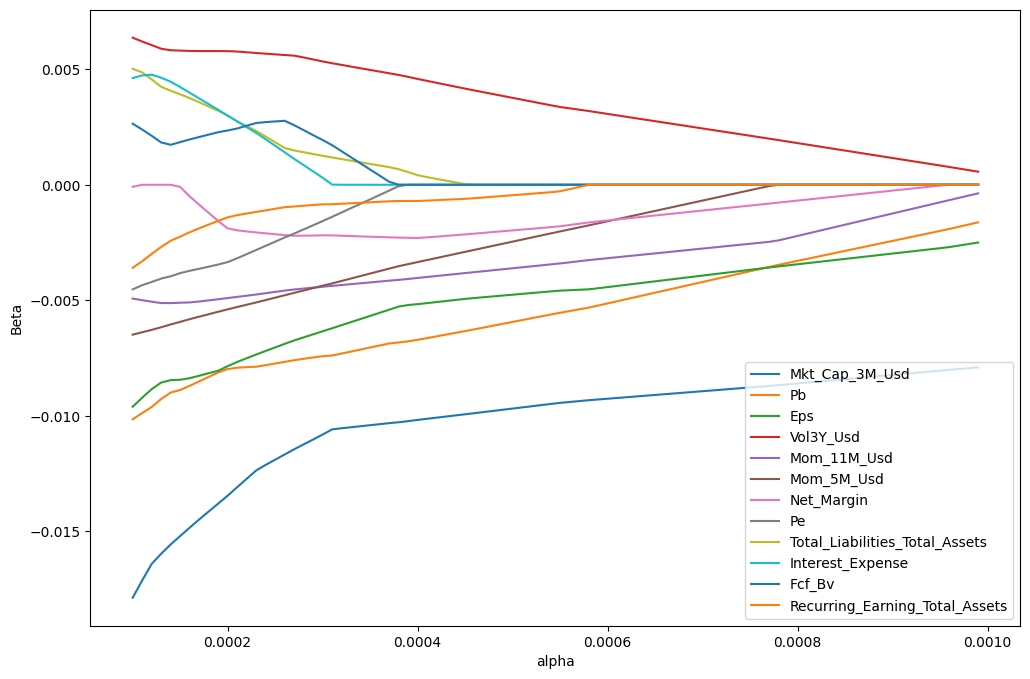

In [ ]:
df_lasso_res.loc[:,predictors].plot(xlabel='alpha',ylabel='Beta',figsize=(12,8));

## Ridge

### Fitting Model for Different Values of `alpha`

In [ ]:
n_alphas = 50
alphas = np.logspace(-2, 4, n_alphas) # transforming into log for Aspect ratio 
ridge_res = {} # declaring the dict that will receive the model's result 

for alpha in alphas: # looping through the different alphas/lambdas values
  ridge = Ridge(alpha=alpha) # model
  ridge.fit(X, y) # fit the model
  ridge_res[alpha] = ridge.coef_ # extract RIDGE coefs

### Clever Way to Display the Coefficients for Different Values of `alpha`

In [ ]:
df_ridge_res = pd.DataFrame(ridge_res).T # transpose the dataframe for plotting
df_ridge_res.columns = features # adding the names of the factors
df_ridge_res

,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,...,Share_Turn_6M,Ta,Tev_Less_Mktcap,Tot_Debt_Rev,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd
0.010000,0.035339,-0.021845,-0.027443,-0.008634,0.001677,-0.002159,-0.008489,0.002442,-0.012172,-0.241757,...,0.011697,-0.015158,0.001155,0.001345,0.007070,0.011196,0.005027,0.009544,0.008656,0.006522
0.013257,0.035343,-0.021843,-0.027450,-0.008634,0.001677,-0.002160,-0.008489,0.002442,-0.012172,-0.199309,...,0.011698,-0.015155,0.001155,0.001345,0.007069,0.011197,0.005027,0.009544,0.008656,0.006522
0.017575,0.035349,-0.021840,-0.027459,-0.008634,0.001677,-0.002160,-0.008489,0.002442,-0.012172,-0.161960,...,0.011699,-0.015153,0.001155,0.001344,0.007069,0.011197,0.005027,0.009544,0.008656,0.006522
0.023300,0.035358,-0.021838,-0.027471,-0.008634,0.001677,-0.002161,-0.008489,0.002442,-0.012172,-0.130048,...,0.011701,-0.015149,0.001155,0.001344,0.007069,0.011197,0.005026,0.009544,0.008656,0.006521
0.030888,0.035370,-0.021835,-0.027486,-0.008634,0.001677,-0.002161,-0.008489,0.002442,-0.012172,-0.103457,...,0.011704,-0.015144,0.001155,0.001344,0.007069,0.011197,0.005026,0.009544,0.008656,0.006521
0.040949,0.035388,-0.021833,-0.027506,-0.008634,0.001677,-0.002162,-0.008489,0.002442,-0.012172,-0.081762,...,0.011708,-0.015138,0.001155,0.001344,0.007068,0.011197,0.005026,0.009544,0.008656,0.006521
0.054287,0.035411,-0.021831,-0.027531,-0.008634,0.001677,-0.002162,-0.008489,0.002441,-0.012172,-0.064360,...,0.011715,-0.015130,0.001155,0.001343,0.007067,0.011198,0.005026,0.009544,0.008656,0.006521
0.071969,0.035443,-0.021829,-0.027564,-0.008634,0.001677,-0.002163,-0.008489,0.002441,-0.012172,-0.050595,...,0.011723,-0.015119,0.001155,0.001342,0.007065,0.011198,0.005026,0.009544,0.008656,0.006521
0.095410,0.035486,-0.021827,-0.027608,-0.008635,0.001677,-0.002164,-0.008488,0.002441,-0.012172,-0.039823,...,0.011735,-0.015105,0.001154,0.001341,0.007063,0.011198,0.005026,0.009543,0.008655,0.006522
0.126486,0.035543,-0.021826,-0.027664,-0.008635,0.001677,-0.002165,-0.008488,0.002441,-0.012172,-0.031466,...,0.011751,-0.015086,0.001153,0.001340,0.007060,0.011199,0.005025,0.009543,0.008655,0.006522


### Plotting the Coefficients for Different Values of `alpha`

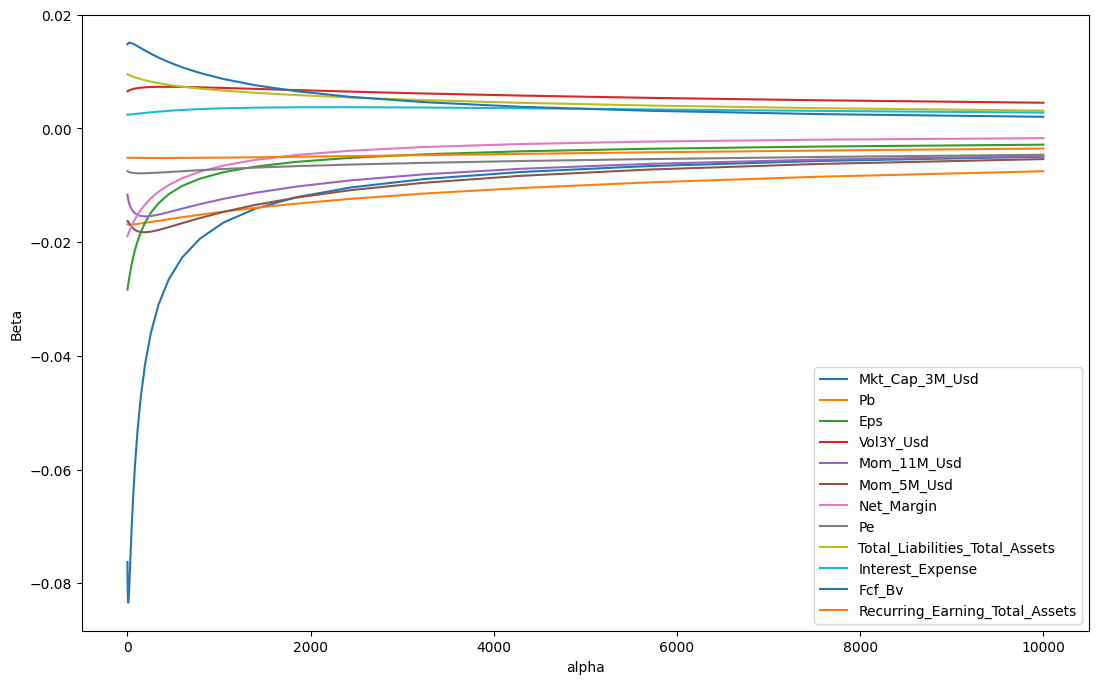

In [ ]:
df_ridge_res.loc[:,predictors].plot(xlabel='alpha',ylabel='Beta',figsize=(13,8));

## Out-of-Sample Hit Rate

Doing a train-test-split on the data.

In [ ]:
separation_date = '2014-01-15'
df_train = df_ml.query('date < @separation_date')
df_test = df_ml.query('date >= @separation_date')

Separating out features and labels

In [ ]:
# training data
X_train = df_train[features]
y_train = df_train['R1M_Usd']

# testing data
X_test = df_test[features] # Predictors
y_test = df_test['R1M_Usd'] # Dependent variable

Fitting one elastic net model

In [ ]:
model = ElasticNet(alpha=0.1, l1_ratio=0.1) # model
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

Calculating the out-of-sample hit ratio.

In [ ]:
hit_ratio = np.mean(model.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hit_ratio}')

Hit Ratio: 0.5460346399270738


Notice that something is kind of fucked up with the model and it is always predicting the same thing for everything.  Maybe need to inform the authors.

In [ ]:
#np.mean(y_test > 0)
model.predict(X_test)

array([0.01392088, 0.01392088, 0.01392088, ..., 0.01392088, 0.01392088,
       0.01392088])

In [ ]:
np.unique(model.predict(X_test))

array([0.01392088])

## Exercise

On the test sample -  evaluate the impact of the two elastic net parameters on out-of-sample accuracy.

This entail fitting the model for various values of the parameters and checking the out of sample hit-rate.  You should do this exercise.